## Imports and Functions
> For checking atomicity and making a non minimal nfa for a given nfa

By default, $\Sigma = \{a,b\}$

In [ ]:
import sys,os
is_this_colab = 'google.colab' in sys.modules
if is_this_colab:
    !git clone https://github.com/jsmaskeen/finite-automata.git
    %cd finite-automata
else:
    %cd ..
    os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

In [2]:
from src.fa.nfa import NFA
from src.utils.visualizer import Visualizer as vis
from src.algo.atomicity import check_atomicity,make_atomic_by_reverse_min,make_nonminimal


## Language = $\Sigma^*ab\Sigma^*$

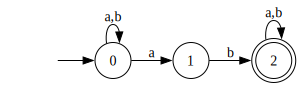

In [3]:
nfa = NFA()
nfa.setSigma({'a', 'b'})
for s in [str(i) for i in range(3)]:
    nfa.addState(s)
nfa.setInitial('0')
nfa.addFinal('2')
nfa.addTransition('0', 'a', '0')
nfa.addTransition('0', 'b', '0')
nfa.addTransition('0', 'a', '1')
nfa.addTransition('1', 'b', '2')
nfa.addTransition('2', 'a', '2')
nfa.addTransition('2', 'b', '2')

vis.to_graphviz(nfa)

### Atomicity of the NFA

In [4]:
print(check_atomicity(nfa))

False


### Converting this NFA to DFA, minimising it, casting it as NFA and checking the atomicity. 

Since this will be the canonical DFA, it is supposed to be atomic

True


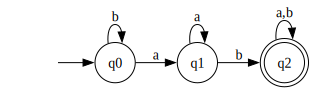

In [5]:
canonical_dfa:NFA = nfa.toDFA().minimal().toNFA()
print(check_atomicity(canonical_dfa))
vis.to_graphviz(canonical_dfa)

### Converting the NFA to an atomic NFA by the process of:

Let $N$ be any NFA for $L$.

Then, $N^{RDMR}$ is a atomic NFA for $L$

True


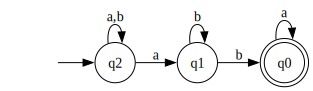

In [6]:
atomic_nfa = make_atomic_by_reverse_min(nfa.reversal())
print(check_atomicity(atomic_nfa))
vis.to_graphviz(atomic_nfa)

### Converting a atomic NFA to a Non-Atomic NFA

As Theorem 3 of section 3 states in [https://arxiv.org/pdf/1301.5585](https://arxiv.org/pdf/1301.5585),

<b>Theorem 3: </b><i>A trim NFA $N$ is atomic if and only if $N^{RD}$ is
minimal.</i>

So, <i>A NFA $N^{R}$ is atomic if and only if $N^{D}$ is
minimal.</i>

So, <i>A NFA $N^{R}$ is non atomic if and only if $N^{D}$ is
non minimal.</i>

So, If we have a non minimal DFA $N^{D}$ for $L^{R}$, then the NFA $N^{DR}$ is non atomic for $L$.

So we start with a DFA which accepts $L^{R}$, then we cast it as NFA and, make it non-minimal, and then reverse, we will have a non atomic NFA for $L$

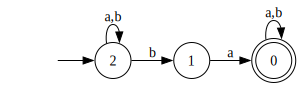

In [7]:
nfa_for_L_R = nfa.reversal()
vis.to_graphviz(nfa_for_L_R)

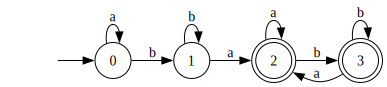

In [8]:
dfa_for_L_R = nfa_for_L_R.toDFA()
vis.to_graphviz(dfa_for_L_R)

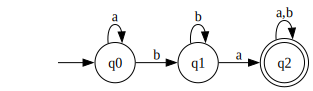

In [9]:
minimal_dfa_for_L_R = dfa_for_L_R.minimal() # Just for visualization, not really needed
vis.to_graphviz(minimal_dfa_for_L_R)

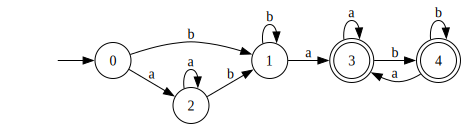

In [10]:
non_minimal_dfa_for_L_R = make_nonminimal(dfa_for_L_R.toNFA()).toDFA()
vis.to_graphviz(non_minimal_dfa_for_L_R)

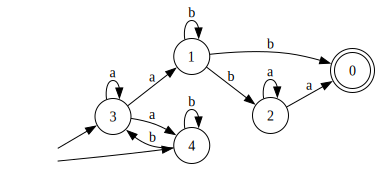

In [11]:
non_atomic_nfa_for_L = non_minimal_dfa_for_L_R.reversal()
vis.to_graphviz(non_atomic_nfa_for_L)

### Check if the non atomic NFA, atomic NFA are equivalent to the original NFA ?

In [12]:
print(atomic_nfa.is_equivalent_to(nfa))
print(non_atomic_nfa_for_L.is_equivalent_to(nfa))

True
True


## Language = $\Sigma^*aba\Sigma^*$

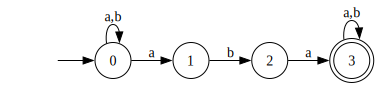

In [13]:

nfa = NFA()
nfa.setSigma({'a', 'b'})
for s in [str(i) for i in range(4)]:
    nfa.addState(s)
nfa.setInitial('0')
nfa.addFinal('3')
nfa.addTransition('0', 'a', '0')
nfa.addTransition('0', 'b', '0')
nfa.addTransition('0', 'a', '1')
nfa.addTransition('1', 'b', '2')
nfa.addTransition('2', 'a', '3')
nfa.addTransition('3', 'a', '3')
nfa.addTransition('3', 'b', '3')

vis.to_graphviz(nfa)

### Atomicity of the NFA

In [14]:
print(check_atomicity(nfa))

False


### Converting this NFA to DFA, minimising it, casting it as NFA and checking the atomicity. 

Since this will be the canonical DFA, it is supposed to be atomic

True


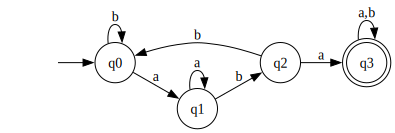

In [15]:
canonical_dfa:NFA = nfa.toDFA().minimal().toNFA()
print(check_atomicity(canonical_dfa))
vis.to_graphviz(canonical_dfa)

### Converting the NFA to an atomic NFA by the process of:

Let $N$ be any NFA for $L$.

Then, $N^{RDMR}$ is a atomic NFA for $L$

True


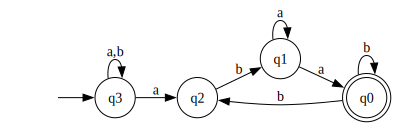

In [16]:
atomic_nfa = make_atomic_by_reverse_min(nfa.reversal())
print(check_atomicity(atomic_nfa))
vis.to_graphviz(atomic_nfa)

### Converting a atomic NFA to a Non-Atomic NFA

As Theorem 3 of section 3 states in [https://arxiv.org/pdf/1301.5585](https://arxiv.org/pdf/1301.5585),

<b>Theorem 3: </b><i>A trim NFA $N$ is atomic if and only if $N^{RD}$ is
minimal.</i>

So, <i>A NFA $N^{R}$ is atomic if and only if $N^{D}$ is
minimal.</i>

So, <i>A NFA $N^{R}$ is non atomic if and only if $N^{D}$ is
non minimal.</i>

So, If we have a non minimal DFA $N^{D}$ for $L^{R}$, then the NFA $N^{DR}$ is non atomic for $L$.

So we start with a DFA which accepts $L^{R}$, then we cast it as NFA and, make it non-minimal, and then reverse, we will have a non atomic NFA for $L$

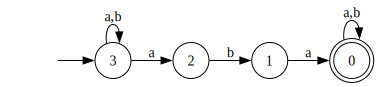

In [17]:
nfa_for_L_R = nfa.reversal()
vis.to_graphviz(nfa_for_L_R)

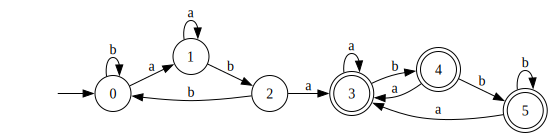

In [18]:
dfa_for_L_R = nfa_for_L_R.toDFA()
vis.to_graphviz(dfa_for_L_R)

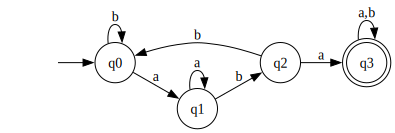

In [19]:
minimal_dfa_for_L_R = dfa_for_L_R.minimal() # Just for visualization, not really needed
vis.to_graphviz(minimal_dfa_for_L_R)

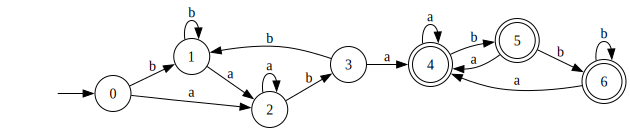

In [20]:
non_minimal_dfa_for_L_R = make_nonminimal(dfa_for_L_R.toNFA()).toDFA()
vis.to_graphviz(non_minimal_dfa_for_L_R)

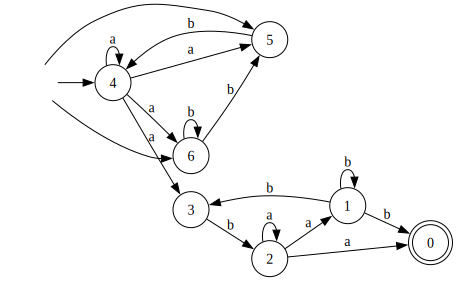

In [21]:
non_atomic_nfa_for_L = non_minimal_dfa_for_L_R.reversal()
vis.to_graphviz(non_atomic_nfa_for_L)

### Check if the non atomic NFA, atomic NFA are equivalent to the original NFA ?

In [22]:
print(atomic_nfa.is_equivalent_to(nfa))
print(non_atomic_nfa_for_L.is_equivalent_to(nfa))

True
True


## Language = $\Sigma^*abc\Sigma^*$

### $\Sigma = \{a,b,c\}$

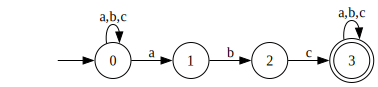

In [23]:

nfa = NFA()
nfa.setSigma({'a', 'b','c'})
for s in [str(i) for i in range(4)]:
    nfa.addState(s)
nfa.setInitial('0')
nfa.addFinal('3')
nfa.addTransition('0', 'a', '0')
nfa.addTransition('0', 'b', '0')
nfa.addTransition('0', 'c', '0')
nfa.addTransition('0', 'a', '1')
nfa.addTransition('1', 'b', '2')
nfa.addTransition('2', 'c', '3')
nfa.addTransition('3', 'a', '3')
nfa.addTransition('3', 'b', '3')
nfa.addTransition('3', 'c', '3')

vis.to_graphviz(nfa)

### Atomicity of the NFA

In [24]:
print(check_atomicity(nfa))
print('-')

False
-


### Converting this NFA to DFA, minimising it, casting it as NFA and checking the atomicity. 

Since this will be the canonical DFA, it is supposed to be atomic

True


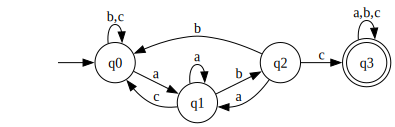

In [25]:
canonical_dfa:NFA = nfa.toDFA().minimal().toNFA()
print(check_atomicity(canonical_dfa))
vis.to_graphviz(canonical_dfa)

### Converting the NFA to an atomic NFA by the process of:

Let $N$ be any NFA for $L$.

Then, $N^{RDMR}$ is a atomic NFA for $L$

True


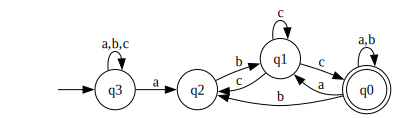

In [26]:
atomic_nfa = make_atomic_by_reverse_min(nfa.reversal())
print(check_atomicity(atomic_nfa))
vis.to_graphviz(atomic_nfa)

### Converting a atomic NFA to a Non-Atomic NFA

As Theorem 3 of section 3 states in [https://arxiv.org/pdf/1301.5585](https://arxiv.org/pdf/1301.5585),

<b>Theorem 3: </b><i>A trim NFA $N$ is atomic if and only if $N^{RD}$ is
minimal.</i>

So, <i>A NFA $N^{R}$ is atomic if and only if $N^{D}$ is
minimal.</i>

So, <i>A NFA $N^{R}$ is non atomic if and only if $N^{D}$ is
non minimal.</i>

So, If we have a non minimal DFA $N^{D}$ for $L^{R}$, then the NFA $N^{DR}$ is non atomic for $L$.

So we start with a DFA which accepts $L^{R}$, then we cast it as NFA and, make it non-minimal, and then reverse, we will have a non atomic NFA for $L$

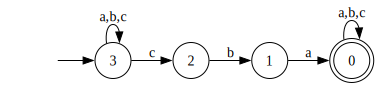

In [27]:
nfa_for_L_R = nfa.reversal()
vis.to_graphviz(nfa_for_L_R)

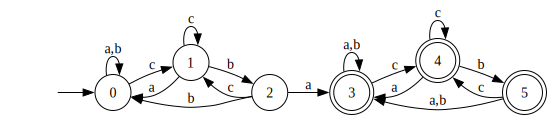

In [28]:
dfa_for_L_R = nfa_for_L_R.toDFA()
vis.to_graphviz(dfa_for_L_R)

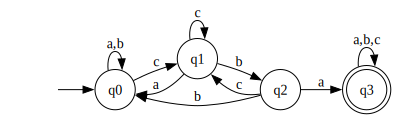

In [29]:
minimal_dfa_for_L_R = dfa_for_L_R.minimal() # Just for visualization, not really needed
vis.to_graphviz(minimal_dfa_for_L_R)

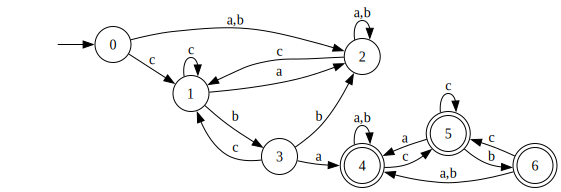

In [30]:
non_minimal_dfa_for_L_R = make_nonminimal(dfa_for_L_R.toNFA()).toDFA()
vis.to_graphviz(non_minimal_dfa_for_L_R)

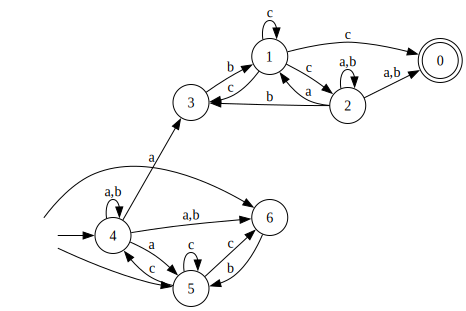

In [31]:
non_atomic_nfa_for_L = non_minimal_dfa_for_L_R.reversal()
vis.to_graphviz(non_atomic_nfa_for_L)

### Check if the non atomic NFA, atomic NFA are equivalent to the original NFA ?

In [32]:
print(atomic_nfa.is_equivalent_to(nfa))
print(non_atomic_nfa_for_L.is_equivalent_to(nfa))

True
True
